In [70]:
import math  as mth
import numpy as np
import pickle
import matplotlib.pyplot as plt

def Save(obj, doc_path = '.', save_name = 'pkl_file'):
    model_name = save_name + '.pkl' 
    with open(doc_path+ '/'+ model_name, 'wb') as file:
        pickle.dump(obj, file)     

def Read_pickle(doc_path):
        with open(doc_path, 'rb') as file:
            result = pickle.load(file)  
        return result

# Exercise 01

## Fibonacci Series

In [5]:
# Fibonacci Series
fibSer , ratioSer = [1,1] , [1]

for i in range(2,20):
    an = fibSer[i-1] + fibSer[i-2]
    ratio = fibSer[i-1] / an
    fibSer.append(an)
    ratioSer.append(ratio)
    
print(fibSer)
print(ratioSer) # The ratio converge to the golden ratio

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
[1, 0.5, 0.6666666666666666, 0.6, 0.625, 0.6153846153846154, 0.6190476190476191, 0.6176470588235294, 0.6181818181818182, 0.6179775280898876, 0.6180555555555556, 0.6180257510729614, 0.6180371352785146, 0.6180327868852459, 0.6180344478216818, 0.6180338134001252, 0.6180340557275542, 0.6180339631667066, 0.6180339985218034]


## Elliptic integral

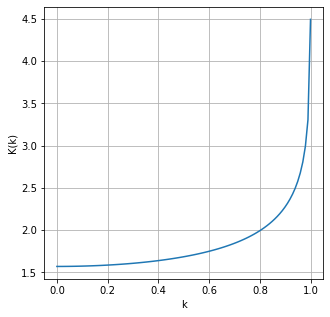

In [6]:
# Elliptic integral
def F(theta, k):
    x = (k*np.sin(theta))**2
    y = (1-x)**(-0.5) 
    return y

def K(k):
# Trapezium Method for integral
    theta   = np.linspace(0, np.pi/2, num=500)
    dtheta  = theta[1] - theta[0]
    F_value = F(theta, k)
    I = ( F_value.sum() - (F_value[0] + F_value[-1])/2 ) * dtheta 
    return I

# Calculate K(k) for k from 0 to 0.999, plot K(k) and save as a txt file
ks = np.linspace(0, 0.999, num=100)
Ks = [K(k) for k in ks]

# Plot
fig = plt.figure( figsize = (5,5) );
plt.plot(ks,Ks);
plt.xlabel('k'); 
plt.ylabel('K(k)');
plt.grid( visible = True );
fig.savefig('./Exercise01_EllipticIntegral.jpg', bbox_inches = 'tight')

# Save txt
f = open("./Exercise01_EllipticIntegral_writefiles.txt","w")
for i in range(len(ks)):
    writtenStr = '\tk = %.6f\tK(k) = %.6f\n'%(ks[i],Ks[i])
    f.write(writtenStr)
f.close()

## Matrix similarity

In [71]:
from numpy import linalg as LA

In [69]:
def similar(A,B):
# Check whether two matrices A and B are similar
    eigVal_A , _ = LA.eig(A)
    eigVal_B , _ = LA.eig(B)
    eigVal_A , eigVal_B = np.sort(eigVal_A) , np.sort(eigVal_B) # Sort eigenvalues
    
    if len(eigVal_A) != len(eigVal_B):
        return False
    else:
        return np.all( eigVal_A == eigVal_B )

In [93]:
A = np.array([[0,1],[5,3]])
B = np.array([[1,2],[4,3]])
print(similar(A,B))

False


In [82]:
C = np.array([[1,2],[-1,4]])
D = np.array([[-1,6],[-2,6]])
print(similar(C,D))

True


# Exercise 02

## Reverse of List

In [42]:
# Random digits: list and reversed list
randlst = np.random.rand(10)
print(randlst)

randlst_reverse = randlst[::-1]
print(randlst_reverse)

# Reverse of string
Str = 'tacocat'
Str_reverse = Str[::-1]
print( Str == Str_reverse )

[0.43714326 0.36338016 0.67461556 0.62290222 0.58591208 0.45281758
 0.25664246 0.01770572 0.98466782 0.26108539]
[0.26108539 0.98466782 0.01770572 0.25664246 0.45281758 0.58591208
 0.62290222 0.67461556 0.36338016 0.43714326]
True


In [43]:
# Sort reversely
f = open("Exercise02_GradeBook.txt","r")
Alpha = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXY")
FinalGrade = {}

for line in f:
    
    line = line.replace("\n","").split(",")
    
    # If the grade starts with letters, drop it
    if line[1][0] in Alpha:
        continue
        
    FinalGrade.update( { line[0] : int(line[1])*0.1 + int(line[2])*0.9 } )
    
f.close()

# Print the list of tuples for the final grades
FinalGrade_descending = sorted(FinalGrade.items(), key = lambda x: x[1], reverse = True)
print(FinalGrade_descending, end = '\n\n')

# Print the highest 5 students' number
rank = 0
current_grade = 0

for grade in FinalGrade_descending:
          
    if grade[1] != current_grade:
        rank += 1
        current_grade = grade[1]
        
    if rank >= 6:
        break
    else:
        print(grade[0] + ", Final Grade %.1f"%grade[1])  

[('Student5', 91.0), ('Student12', 91.0), ('Student14', 91.0), ('Student22', 91.0), ('Student25', 91.0), ('Student27', 91.0), ('Student33', 91.0), ('Student82', 91.0), ('Student86', 91.0), ('Student92', 91.0), ('Student94', 91.0), ('Student18', 81.9), ('Student46', 81.9), ('Student47', 81.9), ('Student48', 81.9), ('Student51', 81.9), ('Student55', 81.9), ('Student57', 81.9), ('Student59', 81.9), ('Student74', 81.9), ('Student113', 81.9), ('Student120', 81.9), ('Student121', 81.9), ('Student2', 72.8), ('Student7', 72.8), ('Student15', 72.8), ('Student39', 72.8), ('Student42', 72.8), ('Student43', 72.8), ('Student53', 72.8), ('Student54', 72.8), ('Student104', 72.8), ('Student107', 72.8), ('Student122', 72.8), ('Student123', 72.8), ('Student16', 63.7), ('Student23', 63.7), ('Student24', 63.7), ('Student34', 63.7), ('Student36', 63.7), ('Student45', 63.7), ('Student58', 63.7), ('Student62', 63.7), ('Student80', 63.7), ('Student106', 63.7), ('Student111', 63.7), ('Student1', 54.6), ('Stude

## Translation from Imread to Matplotlib

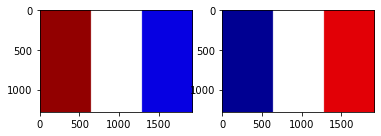

In [44]:
import cv2
img = cv2.imread('Exercise02_France.png', cv2.IMREAD_COLOR)

plt.subplot(121) # Plot before reversion
plt.imshow(img);
plt.subplot(122) # Plot after reversion
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

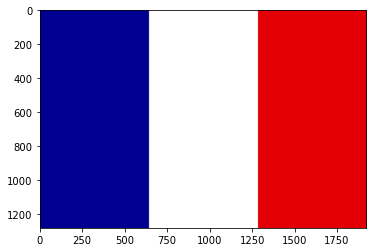

In [49]:
# Anoter way for reversion
img_RGB = img[:,:,[2,1,0]]
plt.imshow(img_RGB);

# Exercise 03 FNN & CNN

## Run an image classification model in the CIFAR10 dataset:
You will need to:
- Load the data, and load into dataloaders
- Define a network (see end)
- Define an optimizer (recommened [Stochastic Gradient Descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) with lr = 0.01)
- Define loss function (reccommend [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) (note, a softmax function should not be used in the final layer of the network when using CrossEntropy))
- Run a training loop
- Write some code which print a montage of images, with the title on each subplot as the ground truth label and the predicted label

Some remarks:
- The images in CIFAR10 are RGB images, and are therefore of shape $(32,32,3)$, unlike MNIST which were greyscale and of shape $(28,28)$.
- Pytorch requires inputs to a convolutional layer to be of shape (BatchSize,Channels,Height,Width). When using dataloaders this is done automatically, and so during your training loop you won't need to worry about this. However, if defining your own function (for example for plotting the output of the model), executing: "img, label = train_data[0]" will error as img is of shape (3,32,32), and not (1,3,32,32) -- (as you are essentially passing a batch of 1 when predicting a single image **img.unsqueeze(0)**.
- A similar problem here is when plotting the image. matplotlib expects your image to be of shape (32,32,3) (i.e. the channels to be the final dim). To transpose an image from shape (3,32,32) to (32,32,3), use the np.transpose function as in: img = np.transpose(img,[1,2,0])


## Network:
You can in principle define your own architecture, but I recommend making a simple network according to the following pseduocode
* Conv2D (with filters 6, padding = 1) (remark: in_channels will be 3 here as RGB image!)
* ReLU, MaxPool
* Conv2D (with filters 16, padding = 1) 
* ReLU, MaxPool
* Flatten
* FullyConnectedLayer, 120 (has input 8x8x16)
* FullyConnectedLayer, 84
* FullyConnectedLayer, 10

As we aren't using softmax, the predicted class of the network will be the entry with the maximum value.

This network contains a relatively low number of parameters. This is so it will train in a reasonable amount of time on your machine. As a result, your network accuracy will not be amazing. Do not worry about this.

In [18]:
# 数据准备用包
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# 搭建、训练网络用包
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [42]:
# load data
train_data = datasets.CIFAR10(root='data', train=True, transform=ToTensor(), download=True)
test_data = datasets.CIFAR10(root='data', train=False, transform=ToTensor())

# loaders
loaders = { 'train' : torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True, num_workers=1),
            'test'  : torch.utils.data.DataLoader(test_data,  batch_size=50, shuffle=True, num_workers=1) }

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [81]:
# network construction
class CNN(nn.Module): 
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(   
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3), padding=1), # [BS,6,32,32]
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) # [BS,6,16,16]
        )
        
        self.conv2 = nn.Sequential(   
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(3,3), padding=1), # [BS,16,16,16]
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) # [BS,16,8,8]
        )
        
            
        self.FC = nn.Sequential( 
            nn.Linear(1024, 120), # [BS, 16*8*8] -> [BS, 120]
            nn.Linear(120, 84),   # [BS, 120] -> [BS, 84]
            nn.Linear(84, 10)     # [BS, 84] -> [BS, 10]
        )
        
    def forward(self, x):        # [BS,3,32,32] -> [BS, 10]
        x = self.conv1(x) 
        x = self.conv2(x) 
        x = x.view(x.size(0), -1) # flatten 
        x = self.FC(x)            
        return x  

In [72]:
# 训练函数
def train(model, loaders, num_epochs, learning_rate=0.01):
    
    ## 将模型设置为训练模式
    model.train() 
        
    # Optimizer & Loss function
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)   # 采用Adam优化器
    loss_func = nn.CrossEntropyLoss()   
    
    for epoch in range(num_epochs):
        for i, (features, labels) in enumerate(loaders['train']):   
            
            ## Forward calculation for the loss function 
            output = model(features)        # model.forward(features)
            loss = loss_func(output, labels)
 
            ## Backpropagation, update parameters
            optimizer.zero_grad()           # clear gradients
            loss.backward()                 # back propgation 
            optimizer.step()                # update parameters
            
            # Display the training progress
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, len(loaders['train']), loss.item())) 
                
                
# 测试函数                
def test(model):
    
    ## 将模型设置为测试模式
    model.eval()
    
    test_loss, correct = 0, 0 #  累计测试集上的总损失和正确预测的样本数
    
    with torch.no_grad():     ## 这是一个上下文管理器，用于暂时关闭自动求导
        
        for features, labels in loaders['test']:
            output = model(features)
            test_loss += F.cross_entropy(output, labels, reduction='sum').item() # 计算loss
            pred = output.data.max(1, keepdim=True)[1]          # 返回值是一个元组，第一个元素是最大值tensor，第二个元素是最大值所在的索引tensor。    
            correct += pred.eq(labels.data.view_as(pred)).sum() # 统计正确个数
            
        test_loss /= len(loaders['test'].dataset)               # loaders['test'].dataset 获得所有测试样本
        
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(loaders['test'].dataset), 100. * correct / len(loaders['test'].dataset)))

In [67]:
# model = CNN()
train(model, loaders, num_epochs=100, learning_rate=0.003)
test(model)

Epoch [1/100], Step [100/1000], Loss: 0.8714
Epoch [1/100], Step [200/1000], Loss: 0.6336
Epoch [1/100], Step [300/1000], Loss: 0.8263
Epoch [1/100], Step [400/1000], Loss: 0.9435
Epoch [1/100], Step [500/1000], Loss: 0.7317
Epoch [1/100], Step [600/1000], Loss: 0.7322
Epoch [1/100], Step [700/1000], Loss: 0.5792
Epoch [1/100], Step [800/1000], Loss: 0.8835
Epoch [1/100], Step [900/1000], Loss: 0.7841
Epoch [1/100], Step [1000/1000], Loss: 0.7674
Epoch [2/100], Step [100/1000], Loss: 0.6674
Epoch [2/100], Step [200/1000], Loss: 0.6179
Epoch [2/100], Step [300/1000], Loss: 0.9390
Epoch [2/100], Step [400/1000], Loss: 0.9165
Epoch [2/100], Step [500/1000], Loss: 0.8901
Epoch [2/100], Step [600/1000], Loss: 1.1457
Epoch [2/100], Step [700/1000], Loss: 0.9967
Epoch [2/100], Step [800/1000], Loss: 1.0469
Epoch [2/100], Step [900/1000], Loss: 0.9384
Epoch [2/100], Step [1000/1000], Loss: 0.8860
Epoch [3/100], Step [100/1000], Loss: 1.0380
Epoch [3/100], Step [200/1000], Loss: 0.9923
Epoch [3

Epoch [19/100], Step [100/1000], Loss: 0.8686
Epoch [19/100], Step [200/1000], Loss: 0.8537
Epoch [19/100], Step [300/1000], Loss: 0.9611
Epoch [19/100], Step [400/1000], Loss: 0.8852
Epoch [19/100], Step [500/1000], Loss: 0.7829
Epoch [19/100], Step [600/1000], Loss: 0.9859
Epoch [19/100], Step [700/1000], Loss: 0.7938
Epoch [19/100], Step [800/1000], Loss: 1.0570
Epoch [19/100], Step [900/1000], Loss: 1.1240
Epoch [19/100], Step [1000/1000], Loss: 1.1104
Epoch [20/100], Step [100/1000], Loss: 0.9458
Epoch [20/100], Step [200/1000], Loss: 0.9737
Epoch [20/100], Step [300/1000], Loss: 0.9131
Epoch [20/100], Step [400/1000], Loss: 0.8070
Epoch [20/100], Step [500/1000], Loss: 1.1020
Epoch [20/100], Step [600/1000], Loss: 0.8116
Epoch [20/100], Step [700/1000], Loss: 0.8176
Epoch [20/100], Step [800/1000], Loss: 0.8846
Epoch [20/100], Step [900/1000], Loss: 0.8868
Epoch [20/100], Step [1000/1000], Loss: 0.8592
Epoch [21/100], Step [100/1000], Loss: 0.9419
Epoch [21/100], Step [200/1000],

Epoch [36/100], Step [900/1000], Loss: 0.8050
Epoch [36/100], Step [1000/1000], Loss: 0.7764
Epoch [37/100], Step [100/1000], Loss: 0.6713
Epoch [37/100], Step [200/1000], Loss: 0.7731
Epoch [37/100], Step [300/1000], Loss: 0.7470
Epoch [37/100], Step [400/1000], Loss: 0.7818
Epoch [37/100], Step [500/1000], Loss: 1.0066
Epoch [37/100], Step [600/1000], Loss: 0.8323
Epoch [37/100], Step [700/1000], Loss: 0.8142
Epoch [37/100], Step [800/1000], Loss: 1.4825
Epoch [37/100], Step [900/1000], Loss: 0.6909
Epoch [37/100], Step [1000/1000], Loss: 1.0830
Epoch [38/100], Step [100/1000], Loss: 0.8180
Epoch [38/100], Step [200/1000], Loss: 0.8617
Epoch [38/100], Step [300/1000], Loss: 0.7241
Epoch [38/100], Step [400/1000], Loss: 0.7430
Epoch [38/100], Step [500/1000], Loss: 0.8120
Epoch [38/100], Step [600/1000], Loss: 0.6573
Epoch [38/100], Step [700/1000], Loss: 0.8408
Epoch [38/100], Step [800/1000], Loss: 0.9546
Epoch [38/100], Step [900/1000], Loss: 0.6339
Epoch [38/100], Step [1000/1000]

Epoch [54/100], Step [700/1000], Loss: 0.9175
Epoch [54/100], Step [800/1000], Loss: 0.7871
Epoch [54/100], Step [900/1000], Loss: 0.9532
Epoch [54/100], Step [1000/1000], Loss: 0.9542
Epoch [55/100], Step [100/1000], Loss: 1.0104
Epoch [55/100], Step [200/1000], Loss: 0.8683
Epoch [55/100], Step [300/1000], Loss: 0.7625
Epoch [55/100], Step [400/1000], Loss: 0.8719
Epoch [55/100], Step [500/1000], Loss: 1.0943
Epoch [55/100], Step [600/1000], Loss: 0.7236
Epoch [55/100], Step [700/1000], Loss: 0.7921
Epoch [55/100], Step [800/1000], Loss: 1.0976
Epoch [55/100], Step [900/1000], Loss: 0.8230
Epoch [55/100], Step [1000/1000], Loss: 0.7589
Epoch [56/100], Step [100/1000], Loss: 1.2653
Epoch [56/100], Step [200/1000], Loss: 0.6967
Epoch [56/100], Step [300/1000], Loss: 0.7781
Epoch [56/100], Step [400/1000], Loss: 0.8402
Epoch [56/100], Step [500/1000], Loss: 0.9626
Epoch [56/100], Step [600/1000], Loss: 1.1997
Epoch [56/100], Step [700/1000], Loss: 0.6069
Epoch [56/100], Step [800/1000],

Epoch [72/100], Step [500/1000], Loss: 1.1292
Epoch [72/100], Step [600/1000], Loss: 0.8235
Epoch [72/100], Step [700/1000], Loss: 0.7479
Epoch [72/100], Step [800/1000], Loss: 1.3064
Epoch [72/100], Step [900/1000], Loss: 0.7783
Epoch [72/100], Step [1000/1000], Loss: 1.0734
Epoch [73/100], Step [100/1000], Loss: 0.8840
Epoch [73/100], Step [200/1000], Loss: 1.1708
Epoch [73/100], Step [300/1000], Loss: 1.0475
Epoch [73/100], Step [400/1000], Loss: 0.6761
Epoch [73/100], Step [500/1000], Loss: 1.0077
Epoch [73/100], Step [600/1000], Loss: 0.6422
Epoch [73/100], Step [700/1000], Loss: 1.0535
Epoch [73/100], Step [800/1000], Loss: 0.6830
Epoch [73/100], Step [900/1000], Loss: 0.9136
Epoch [73/100], Step [1000/1000], Loss: 0.6449
Epoch [74/100], Step [100/1000], Loss: 0.8160
Epoch [74/100], Step [200/1000], Loss: 0.7036
Epoch [74/100], Step [300/1000], Loss: 0.6848
Epoch [74/100], Step [400/1000], Loss: 1.0933
Epoch [74/100], Step [500/1000], Loss: 0.8648
Epoch [74/100], Step [600/1000],

Epoch [90/100], Step [300/1000], Loss: 1.1700
Epoch [90/100], Step [400/1000], Loss: 0.9601
Epoch [90/100], Step [500/1000], Loss: 0.8229
Epoch [90/100], Step [600/1000], Loss: 0.7847
Epoch [90/100], Step [700/1000], Loss: 0.7375
Epoch [90/100], Step [800/1000], Loss: 0.6249
Epoch [90/100], Step [900/1000], Loss: 0.6798
Epoch [90/100], Step [1000/1000], Loss: 0.8592
Epoch [91/100], Step [100/1000], Loss: 0.9911
Epoch [91/100], Step [200/1000], Loss: 0.9609
Epoch [91/100], Step [300/1000], Loss: 0.7131
Epoch [91/100], Step [400/1000], Loss: 1.2890
Epoch [91/100], Step [500/1000], Loss: 0.8115
Epoch [91/100], Step [600/1000], Loss: 1.1007
Epoch [91/100], Step [700/1000], Loss: 0.9501
Epoch [91/100], Step [800/1000], Loss: 0.9064
Epoch [91/100], Step [900/1000], Loss: 0.9623
Epoch [91/100], Step [1000/1000], Loss: 1.0398
Epoch [92/100], Step [100/1000], Loss: 0.8617
Epoch [92/100], Step [200/1000], Loss: 0.9371
Epoch [92/100], Step [300/1000], Loss: 0.9414
Epoch [92/100], Step [400/1000],

In [86]:
# Save Model
torch.save(model.state_dict(), './Exercise03_CNNmodel.pth')

# Load Model
model = CNN()  # 这是你的自定义模型类
model.load_state_dict(torch.load('./Exercise03_CNNmodel.pth'))

<All keys matched successfully>

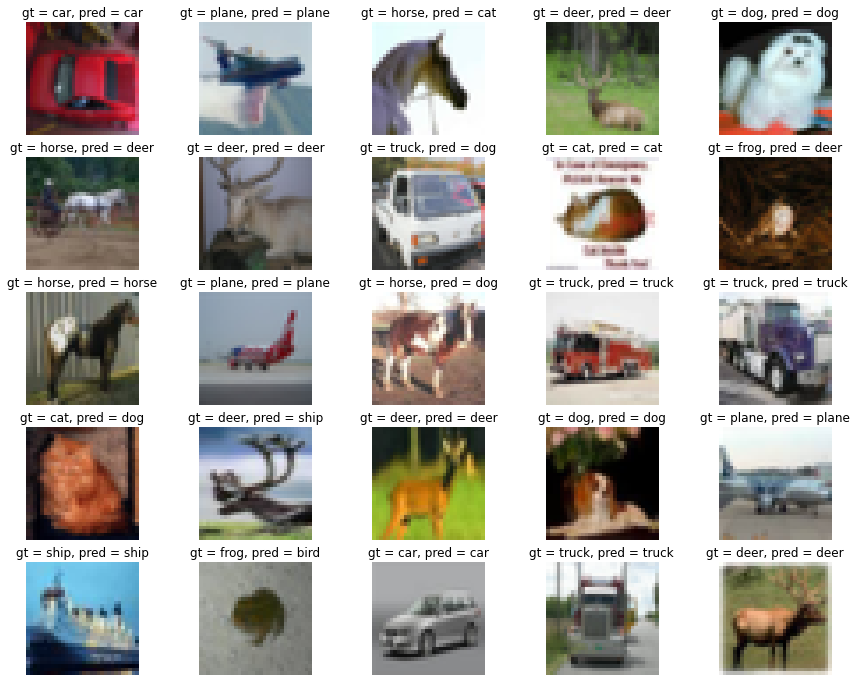

In [87]:
# Plot multiple
figure = plt.figure(figsize=(15, 12))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    output = model(img.unsqueeze(0))
    pred_label = torch.max(output, 1)[1].numpy() # .numpy()将Tensor对象转换为NumPy ndarray对象
    figure.add_subplot(rows, cols, i)
    plt.title('gt = ' + classes[label] + ', pred = '+ classes[pred_label.item()])
    plt.axis("off")
    plt.imshow(np.transpose(img, [1,2,0]), cmap="gray")
plt.show()